<a href="https://colab.research.google.com/github/Festus1977/Kagglex-Project-on-Drug-Interaction-Analysis-by-Temitope-Adetunji/blob/main/Data_Science_Project_by__TEMITOPE__ADETUNJI_Trainer__Darey_io.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Project by *TEMITOPE* ADETUNJI
Trainer: Darey.io

# Improving Patient Care in a Health Sector Using Predictive Analytics

# Problem Definition
Problems to Solve:

* Identify key factors contributing to hospital readmissions.

* Build a machine learning model to predict the probability of readmission within 30 days of discharge.

* Create a dashboard for healthcare providers to visualize patient risk and insights.

* Provide actionable insights to reduce readmission rates, improving overall patient outcomes.

APPROACH USING MACHINE LEARNING (ML):



## Data Collection:
We gathered comprehensive datasets that contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab tests performed, HbA1c test result, diagnosis, number of medications, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

These datasets was obtained from UCI Machine Learning Repository and it is called:UCI Readmission Data. Link to the dataset:
https://archive.ics.uci.edu/static/public/296/diabetes+130-us+hospitals+for+years+1999-2008.zip


## Goal

The goal is to build a predictive model that can identify patients at high risk of readmission within 30 days of discharge, enabling preemptive care measures.



## Importing Libraries


In [ ]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
from sklearn.preprocessing import LabelEncoder

# PostgreSQL
import psycopg2

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


## Loading the data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

# Load the UCI Diabetes Dataset
data = pd.read_csv("/content/gdrive/MyDrive/diabetic_data.csv")

# Display the first few rows
print(data.head())

# Overview of dataset structure
print(data.info())


   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

In [ ]:
#checking first five rows
df = pd.read_csv("/content/gdrive/MyDrive/diabetic_data.csv")
df.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
# Print the names of variables (columns) in the dataset
variables = df.columns.tolist()
print("Variables in the Dataset:")
print(variables)

Variables in the Dataset:
['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [ ]:
#checking data shape
print("Shape of the data:", df.shape)

Shape of the data: (101766, 50)


**Observations**: From the above output, Shape of the data indicates that the dataset has 101,766 rows and 50 columns.


In [ ]:
print("Summary statistics of numerical variables:")
print(df.describe())

Summary statistics of numerical variables:
       encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%     

# Data Cleaning

In [ ]:
# Handle missing values
data = data.dropna()  # Drop rows with missing values

# Encode categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])

# Remove irrelevant columns
data = data.drop(columns=["encounter_id", "patient_nbr"])  # Columns irrelevant to predictions

# Check for duplicates and remove
data = data.drop_duplicates()

# Display cleaned data
print(data.head())


     race  gender  age  weight  admission_type_id  discharge_disposition_id  \
162     3       1    7       0                  6                         3   
192     3       0    3       0                  6                         1   
460     1       0    6       0                  6                         1   
593     3       0    4       0                  6                         1   
696     5       1    6       0                  6                         6   

     admission_source_id  time_in_hospital  payer_code  medical_specialty  \
162                    7                 5           0                  0   
192                    7                 2           0                  0   
460                    7                10           0                  0   
593                    7                 2           0                  0   
696                    7                11           0                  0   

     ...  citoglipton  insulin  glyburide-metformin  glipizide

# Exploratory Data Analysis

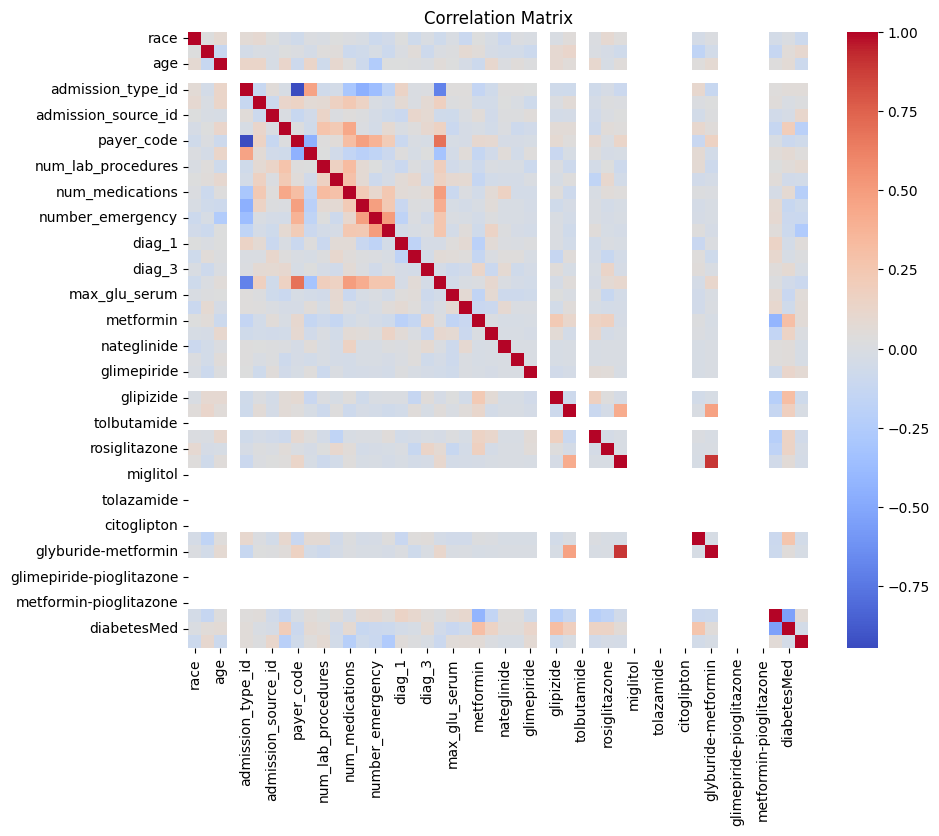

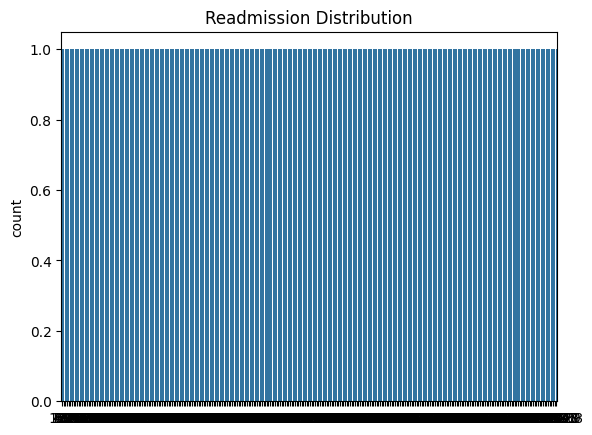

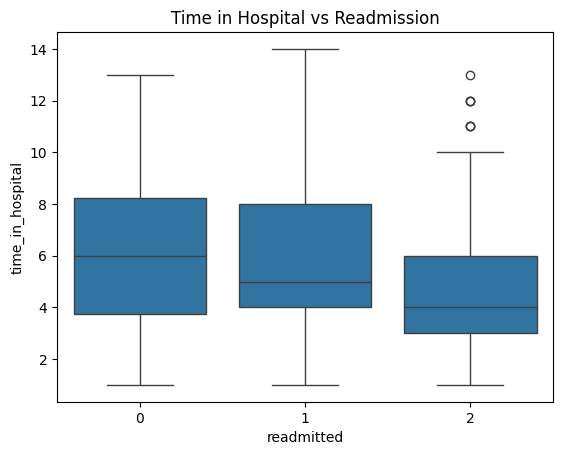

In [ ]:
# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()

# Count of readmissions
sns.countplot(data['readmitted'])
plt.title("Readmission Distribution")
plt.show()

# Identify important features
sns.boxplot(x='readmitted', y='time_in_hospital', data=data)
plt.title("Time in Hospital vs Readmission")
plt.show()


# Feature Engineering


In [ ]:
# Target Variable
y = data['readmitted']  # Binary target: 1 for readmission, 0 for no readmission
X = data.drop(columns=['readmitted'])  # Feature set

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set:", X_train.shape)
print("Testing Set:", X_test.shape)


Training Set: (238, 47)
Testing Set: (60, 47)


# Build Predictive Model

In [ ]:
# Initialize RandomForest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter Tuning
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring="roc_auc")
grid_search.fit(X_train, y_train)

# Best Model
best_rf_model = grid_search.best_estimator_

# Predict on Test Set
y_pred = best_rf_model.predict(X_test)
y_pred_prob = best_rf_model.predict_proba(X_test)[:, 1]

# Predict on Test Set
y_pred = best_rf_model.predict(X_test)
# Get probabilities for the positive class (readmitted)
y_pred_prob = best_rf_model.predict_proba(X_test)[:, 1]

# Model Evaluation
#print("Classification Report:\n", classification_report(y_test, y_pred))
# Remove multi_class parameter or change to 'ovo' if needed for your target variable encoding
# If your target variable has more than 2 classes, modify y_pred_prob accordingly to have probabilities for all classes.
#print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))

# Model Evaluation
#print("Classification Report:\n", classification_report(y_test, y_pred))
#print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))
#print("Classification Report:\n", classification_report(y_test, y_pred))
#print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob, multi_class='ovr, ovo')) # Add multi_class='ovo' or 'ovr'

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0, 1], [0, 1], linestyle="--", color="grey")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


ValueError: multiclass format is not supported